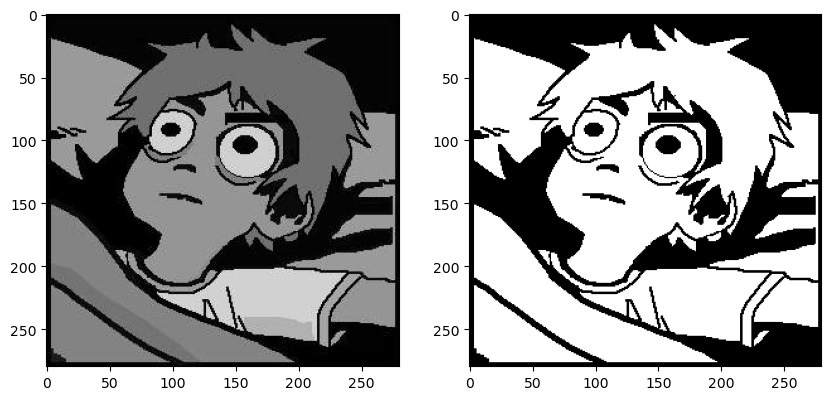

In [5]:
import cv2

import numpy as np 

import matplotlib.pyplot as plt                    

def Isodata(imagen):
    umbral=128
    while True:
        grupo1=imagen[imagen<=umbral]
        grupo2=imagen[imagen>=umbral]
        
        mediag1=np.mean(grupo1)
        mediag2=np.mean(grupo2)
        
        umbral_nuevo=(mediag1+mediag2)/2
        
        if abs(umbral_nuevo-umbral)<0.5:
            break
        umbral=umbral_nuevo
    return umbral



imagen=cv2.imread('img.jpg',0)


umbral_isodata=Isodata(imagen)

_,imagen_isodata=cv2.threshold(imagen,umbral_isodata,255,cv2.THRESH_BINARY)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.imshow(imagen,cmap='gray')

plt.subplot(1,2,2)

plt.imshow(imagen_isodata,cmap='gray')

Tecnica de 2 picos

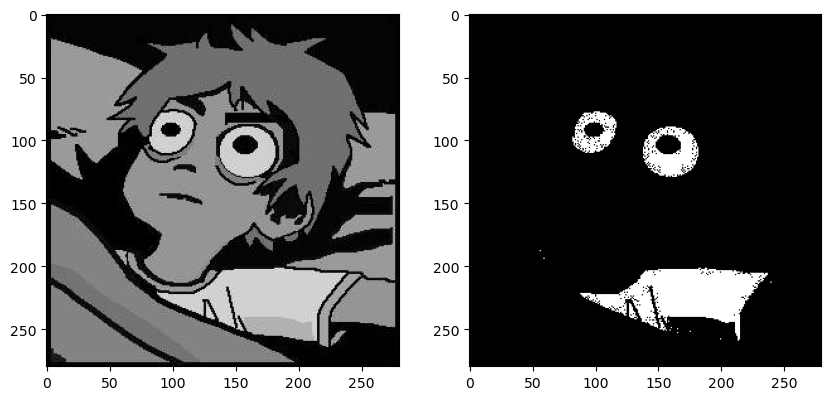

In [6]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt    

def DosPicos(imagen):
    hist=cv2.calcHist([imagen],[0],None,[256],[0,256])
    pico=np.array(hist)
    pico=pico.flatten()
    pico_dif=np.diff(pico)
    primer_pico= np.argmax(pico_dif[:128])
    segundo_pico=np.argmax(pico_dif[:128])+128
    umbral_2picos=int((primer_pico+segundo_pico)/2)
    return umbral_2picos
image=cv2.imread('img.jpg',0)
umbral_2pic=DosPicos(imagen)


_,imagen_isodata=cv2.threshold(imagen,umbral_2pic,255,cv2.THRESH_BINARY)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.imshow(imagen,cmap='gray')

plt.subplot(1,2,2)

plt.imshow(imagen_isodata,cmap='gray')


Metodo de otsu

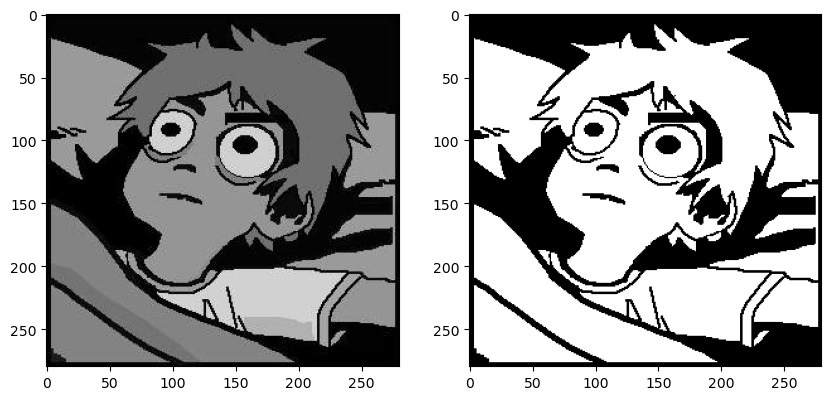

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt    


image=cv2.imread('img.jpg',0)
_,imagen_otsu=cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

umbral_imagen=np.where(image>imagen_otsu,255,0).astype(np.uint8)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.imshow(imagen,cmap='gray')

plt.subplot(1,2,2)

plt.imshow(imagen_otsu,cmap='gray')

plt.show()

Umbralizacion variable - particion de una imagen

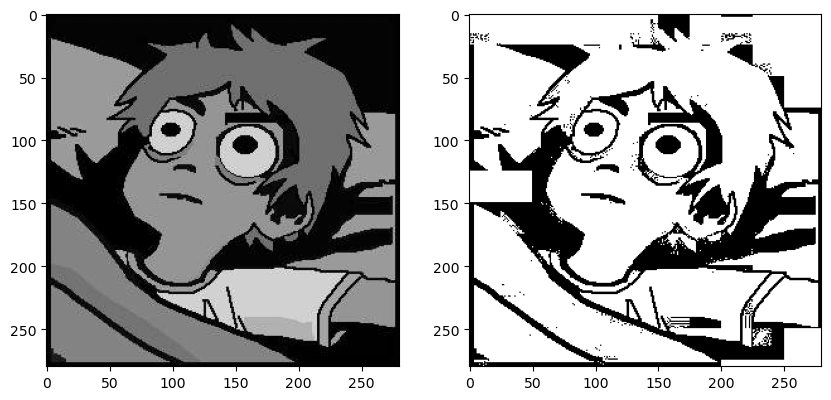

In [23]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt    

def VariableNumBlok(imagen,tam_bloq,c):
    umbral_ima=np.zeros_like(image)
    for  y in range(0,image.shape[0],tam_bloq):
        for x in range(0,image.shape[1],tam_bloq):
            bloque=image[y:y +tam_bloq,x:x+tam_bloq]
            bloque_media=np.mean(bloque)
            umbral_adap=bloque_media-c
            umbral_ima[y:y+tam_bloq]
            umbral_ima[y:y+tam_bloq, x:x+tam_bloq] = (bloque > umbral_adap)*255
    return umbral_ima
    
    
image=cv2.imread('img.jpg',0)
tamBloq=25
c=10
umbra_img_adap=VariableNumBlok(image,tamBloq,c)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.imshow(image,cmap='gray')

plt.subplot(1,2,2)

plt.imshow(umbra_img_adap,cmap='gray')

plt.show()

Con desviacion

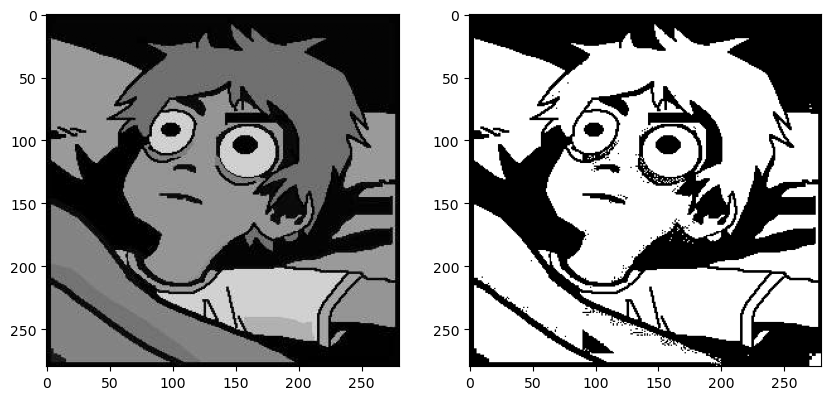

In [22]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt    

def UmbraVar2(imagen,tam_bloq,ajuste):
    umbral_ima=np.zeros_like(image)
    for  y in range(0,image.shape[0],tam_bloq):
        for x in range(0,image.shape[1],tam_bloq):
            bloque=image[y:y +tam_bloq,x:x+tam_bloq]
            bloque_media=np.mean(bloque)
            des=np.std(bloque)
            umbral_adap=bloque_media-(ajuste*des)
            umbral_ima[y:y+tam_bloq, x:x+tam_bloq] = (bloque > umbral_adap)*255
    return umbral_ima
    
    
image=cv2.imread('img.jpg',0)
tamBloq=90
c=0.8
umbra_img_adap=VariableNumBlok(image,tamBloq,c)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.imshow(image,cmap='gray')

plt.subplot(1,2,2)

plt.imshow(umbra_img_adap,cmap='gray')

plt.show()

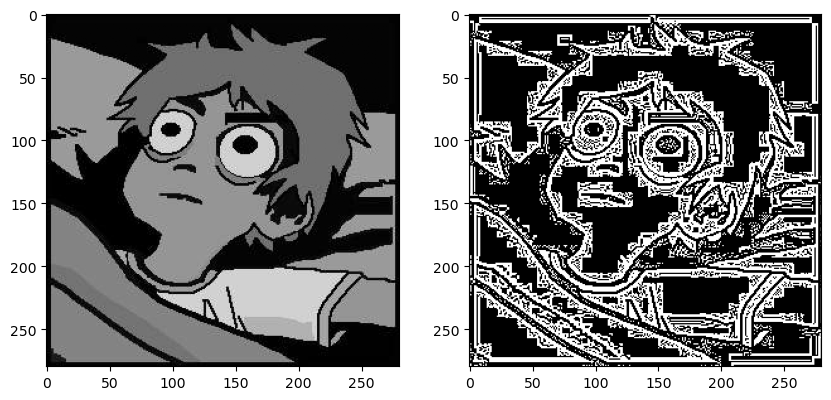

In [45]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt    

def Ventana(imagen,ventana,factor):
    umbre_image=np.zeros_like(imagen)
    pad=ventana//2
    padd_image=cv2.copyMakeBorder(imagen,pad,pad,pad,pad,cv2.BORDER_REPLICATE)
    for y in range(imagen.shape[0]):
        for x in range(imagen.shape[1]):
            ventana1=padd_image[y:y+ventana,x:x+ventana]
            media=np.mean(ventana1)
            dis=np.std(ventana1)
            umbral=media-(factor*dis)
            umbre_image[y,x]=255  if imagen[y,x]>umbral else 0
    return umbre_image    



image=cv2.imread('img.jpg',0)
tamBloq=5 #siempre numero impar
c=0.1
umbra_img_adap=Ventana(image,tamBloq,c)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.imshow(image,cmap='gray')

plt.subplot(1,2,2)

plt.imshow(umbra_img_adap,cmap='gray') 



plt.show()

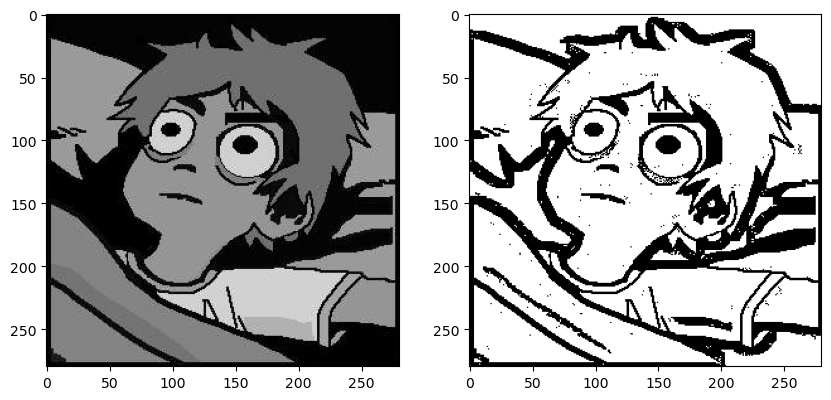

In [46]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt    

image=cv2.imread('img.jpg',0)
Ventana=15 #siempre numero impar
factor=2
umbra_img_adap=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,Ventana,factor)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.imshow(image,cmap='gray')

plt.subplot(1,2,2)

plt.imshow(umbra_img_adap,cmap='gray') 


plt.show()